# Classical RBM training on the Bars-And-Stripes Dataset for Reconstruction
This is an example on classical Gibbs training of an RBM on the BAS(4,4)
dataset.
Developed by: Jose Pinilla

In [1]:
# Required packages
import qaml
import torch
torch.manual_seed(0) # For deterministic weights

import matplotlib.pyplot as plt
import torchvision.transforms as torch_transforms


In [2]:
################################# Hyperparameters ##############################
M,N = SHAPE = (4,4)
DATA_SIZE = N*M
HIDDEN_SIZE = 16
EPOCHS = 2000
SAMPLES = 1000
BATCH_SIZE = 500
# Stochastic Gradient Descent
learning_rate = 0.1
weight_decay = 1e-4
momentum = 0.5


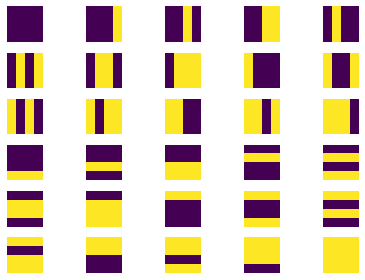

In [3]:
#################################### Input Data ################################
train_dataset = qaml.datasets.BAS(*SHAPE,transform=torch_transforms.ToTensor())
train_sampler = torch.utils.data.RandomSampler(train_dataset,replacement=True,
                                               num_samples=SAMPLES)
train_loader = torch.utils.data.DataLoader(train_dataset,sampler=train_sampler,
                                           batch_size=BATCH_SIZE)

# PLot all data
fig,axs = plt.subplots(6,5)
for ax,(img,label) in zip(axs.flat,train_dataset):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()


In [4]:
################################# Model Definition #############################
# Specify model with dimensions
rbm = qaml.nn.RBM(DATA_SIZE, HIDDEN_SIZE)

# Initialize biases
torch.nn.init.uniform_(rbm.b,-0.1,0.1)
torch.nn.init.uniform_(rbm.c,-0.1,0.1)
torch.nn.init.uniform_(rbm.W,-0.1,0.1)

# Set up optimizer
optimizer = torch.optim.SGD(rbm.parameters(), lr=learning_rate,
                            weight_decay=weight_decay,momentum=momentum)

# Set up training mechanisms
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
CD = qaml.autograd.SampleBasedConstrastiveDivergence()


In [5]:
################################## Model Training ##############################
# Set the model to training mode
rbm.train()
err_log = []
b_log = [rbm.b.detach().clone().numpy()]
c_log = [rbm.c.detach().clone().numpy()]
W_log = [rbm.W.detach().clone().numpy().flatten()]
for t in range(EPOCHS):
    epoch_error = torch.Tensor([0.])
    for img_batch, labels_batch in train_loader:
        input_data = img_batch.flatten(1)

        # Positive Phase
        v0, prob_h0 = input_data, rbm(input_data)
        # Negative Phase
        vk, prob_hk = gibbs_sampler(v0.detach(), k=5)

        # Reconstruction error from Contrastive Divergence
        err = CD.apply((v0,prob_h0), (vk,prob_hk), *rbm.parameters())

        # Do not accumulate gradients
        optimizer.zero_grad()

        # Compute gradients
        err.backward()

        # Update parameters
        optimizer.step()

        #Accumulate error for this epoch
        epoch_error  += err

    # Error Log
    b_log.append(rbm.b.detach().clone().numpy())
    c_log.append(rbm.c.detach().clone().numpy())
    W_log.append(rbm.W.detach().clone().numpy().flatten())
    err_log.append(epoch_error.item())
    print(f"Epoch {t} Reconstruction Error = {epoch_error.item()}")
# Set the model to evaluation mode
# rbm.eval()


Epoch 0 Reconstruction Error = 1.1471493244171143
Epoch 1 Reconstruction Error = 0.778453528881073
Epoch 2 Reconstruction Error = 0.6238430738449097
Epoch 3 Reconstruction Error = 0.7238963842391968
Epoch 4 Reconstruction Error = 0.6672953963279724
Epoch 5 Reconstruction Error = 0.8442558646202087
Epoch 6 Reconstruction Error = 0.5834957361221313
Epoch 7 Reconstruction Error = 0.6003949642181396
Epoch 8 Reconstruction Error = 0.7100077867507935
Epoch 9 Reconstruction Error = 0.6745960712432861
Epoch 10 Reconstruction Error = 0.590897798538208
Epoch 11 Reconstruction Error = 0.7003604769706726
Epoch 12 Reconstruction Error = 0.5482531189918518
Epoch 13 Reconstruction Error = 0.6112627983093262
Epoch 14 Reconstruction Error = 0.7248620986938477
Epoch 15 Reconstruction Error = 0.6028132438659668
Epoch 16 Reconstruction Error = 0.6928189992904663
Epoch 17 Reconstruction Error = 0.5105881690979004
Epoch 18 Reconstruction Error = 0.5367129445075989
Epoch 19 Reconstruction Error = 0.533797383

Epoch 160 Reconstruction Error = 0.36118894815444946
Epoch 161 Reconstruction Error = 0.44067344069480896
Epoch 162 Reconstruction Error = 0.35587793588638306
Epoch 163 Reconstruction Error = 0.45424556732177734
Epoch 164 Reconstruction Error = 0.4281821846961975
Epoch 165 Reconstruction Error = 0.5144755840301514
Epoch 166 Reconstruction Error = 0.36865943670272827
Epoch 167 Reconstruction Error = 0.41037002205848694
Epoch 168 Reconstruction Error = 0.3556908965110779
Epoch 169 Reconstruction Error = 0.4217768907546997
Epoch 170 Reconstruction Error = 0.24130365252494812
Epoch 171 Reconstruction Error = 0.3632628619670868
Epoch 172 Reconstruction Error = 0.6144852042198181
Epoch 173 Reconstruction Error = 0.3738158643245697
Epoch 174 Reconstruction Error = 0.3594726324081421
Epoch 175 Reconstruction Error = 0.5256856083869934
Epoch 176 Reconstruction Error = 0.39166897535324097
Epoch 177 Reconstruction Error = 0.41463473439216614
Epoch 178 Reconstruction Error = 0.38707953691482544
Ep

Epoch 320 Reconstruction Error = 0.16945135593414307
Epoch 321 Reconstruction Error = 0.1645822525024414
Epoch 322 Reconstruction Error = 0.26102569699287415
Epoch 323 Reconstruction Error = 0.1675402820110321
Epoch 324 Reconstruction Error = 0.14660391211509705
Epoch 325 Reconstruction Error = 0.28199151158332825
Epoch 326 Reconstruction Error = 0.1403626799583435
Epoch 327 Reconstruction Error = 0.20112499594688416
Epoch 328 Reconstruction Error = 0.18835312128067017
Epoch 329 Reconstruction Error = 0.2004392445087433
Epoch 330 Reconstruction Error = 0.1631430685520172
Epoch 331 Reconstruction Error = 0.14348384737968445
Epoch 332 Reconstruction Error = 0.17033648490905762
Epoch 333 Reconstruction Error = 0.16686198115348816
Epoch 334 Reconstruction Error = 0.19166558980941772
Epoch 335 Reconstruction Error = 0.15847301483154297
Epoch 336 Reconstruction Error = 0.16110292077064514
Epoch 337 Reconstruction Error = 0.1345692276954651
Epoch 338 Reconstruction Error = 0.23128235340118408

Epoch 483 Reconstruction Error = 0.1541200876235962
Epoch 484 Reconstruction Error = 0.0990242063999176
Epoch 485 Reconstruction Error = 0.13016656041145325
Epoch 486 Reconstruction Error = 0.09965622425079346
Epoch 487 Reconstruction Error = 0.12538498640060425
Epoch 488 Reconstruction Error = 0.12161818146705627
Epoch 489 Reconstruction Error = 0.09655684232711792
Epoch 490 Reconstruction Error = 0.1268843710422516
Epoch 491 Reconstruction Error = 0.1159866452217102
Epoch 492 Reconstruction Error = 0.10321447253227234
Epoch 493 Reconstruction Error = 0.10141438245773315
Epoch 494 Reconstruction Error = 0.11175420880317688
Epoch 495 Reconstruction Error = 0.10022628307342529
Epoch 496 Reconstruction Error = 0.13268974423408508
Epoch 497 Reconstruction Error = 0.12456968426704407
Epoch 498 Reconstruction Error = 0.13065943121910095
Epoch 499 Reconstruction Error = 0.07482481002807617
Epoch 500 Reconstruction Error = 0.12124329805374146
Epoch 501 Reconstruction Error = 0.123299479484558

Epoch 649 Reconstruction Error = 0.05747446417808533
Epoch 650 Reconstruction Error = 0.07152232527732849
Epoch 651 Reconstruction Error = 0.06444045901298523
Epoch 652 Reconstruction Error = 0.07332250475883484
Epoch 653 Reconstruction Error = 0.0994904637336731
Epoch 654 Reconstruction Error = 0.0953613817691803
Epoch 655 Reconstruction Error = 0.05833861231803894
Epoch 656 Reconstruction Error = 0.06619346141815186
Epoch 657 Reconstruction Error = 0.0880037248134613
Epoch 658 Reconstruction Error = 0.06987050175666809
Epoch 659 Reconstruction Error = 0.06960412859916687
Epoch 660 Reconstruction Error = 0.10152152180671692
Epoch 661 Reconstruction Error = 0.08493328094482422
Epoch 662 Reconstruction Error = 0.07782363891601562
Epoch 663 Reconstruction Error = 0.07711651921272278
Epoch 664 Reconstruction Error = 0.08333727717399597
Epoch 665 Reconstruction Error = 0.08942040801048279
Epoch 666 Reconstruction Error = 0.0978599488735199
Epoch 667 Reconstruction Error = 0.087254524230957

Epoch 814 Reconstruction Error = 0.08430320024490356
Epoch 815 Reconstruction Error = 0.05902254581451416
Epoch 816 Reconstruction Error = 0.060510605573654175
Epoch 817 Reconstruction Error = 0.0711301863193512
Epoch 818 Reconstruction Error = 0.053514331579208374
Epoch 819 Reconstruction Error = 0.07566326856613159
Epoch 820 Reconstruction Error = 0.10688874125480652
Epoch 821 Reconstruction Error = 0.059891700744628906
Epoch 822 Reconstruction Error = 0.053561002016067505
Epoch 823 Reconstruction Error = 0.06069871783256531
Epoch 824 Reconstruction Error = 0.06686380505561829
Epoch 825 Reconstruction Error = 0.06386277079582214
Epoch 826 Reconstruction Error = 0.0766325294971466
Epoch 827 Reconstruction Error = 0.07631060481071472
Epoch 828 Reconstruction Error = 0.0712120532989502
Epoch 829 Reconstruction Error = 0.05086803436279297
Epoch 830 Reconstruction Error = 0.06703329086303711
Epoch 831 Reconstruction Error = 0.08494594693183899
Epoch 832 Reconstruction Error = 0.0631505548

Epoch 970 Reconstruction Error = 0.06939172744750977
Epoch 971 Reconstruction Error = 0.05033409595489502
Epoch 972 Reconstruction Error = 0.04412958025932312
Epoch 973 Reconstruction Error = 0.05700311064720154
Epoch 974 Reconstruction Error = 0.07026982307434082
Epoch 975 Reconstruction Error = 0.042653828859329224
Epoch 976 Reconstruction Error = 0.04751688241958618
Epoch 977 Reconstruction Error = 0.057440489530563354
Epoch 978 Reconstruction Error = 0.04787522554397583
Epoch 979 Reconstruction Error = 0.05564841628074646
Epoch 980 Reconstruction Error = 0.03915613889694214
Epoch 981 Reconstruction Error = 0.03740644454956055
Epoch 982 Reconstruction Error = 0.06524568796157837
Epoch 983 Reconstruction Error = 0.05912080407142639
Epoch 984 Reconstruction Error = 0.08610472083091736
Epoch 985 Reconstruction Error = 0.050509750843048096
Epoch 986 Reconstruction Error = 0.05562913417816162
Epoch 987 Reconstruction Error = 0.05967259407043457
Epoch 988 Reconstruction Error = 0.06203469

Epoch 1131 Reconstruction Error = 0.04002493619918823
Epoch 1132 Reconstruction Error = 0.07259529829025269
Epoch 1133 Reconstruction Error = 0.03718176484107971
Epoch 1134 Reconstruction Error = 0.05196887254714966
Epoch 1135 Reconstruction Error = 0.05103588104248047
Epoch 1136 Reconstruction Error = 0.06453099846839905
Epoch 1137 Reconstruction Error = 0.047079235315322876
Epoch 1138 Reconstruction Error = 0.036315590143203735
Epoch 1139 Reconstruction Error = 0.06835821270942688
Epoch 1140 Reconstruction Error = 0.0687139630317688
Epoch 1141 Reconstruction Error = 0.036469966173172
Epoch 1142 Reconstruction Error = 0.03855612874031067
Epoch 1143 Reconstruction Error = 0.05768921971321106
Epoch 1144 Reconstruction Error = 0.04615926742553711
Epoch 1145 Reconstruction Error = 0.042890727519989014
Epoch 1146 Reconstruction Error = 0.04828888177871704
Epoch 1147 Reconstruction Error = 0.05834150314331055
Epoch 1148 Reconstruction Error = 0.051354050636291504
Epoch 1149 Reconstruction E

Epoch 1289 Reconstruction Error = 0.04140704870223999
Epoch 1290 Reconstruction Error = 0.032802462577819824
Epoch 1291 Reconstruction Error = 0.03788354992866516
Epoch 1292 Reconstruction Error = 0.05533382296562195
Epoch 1293 Reconstruction Error = 0.04898369312286377
Epoch 1294 Reconstruction Error = 0.06421118974685669
Epoch 1295 Reconstruction Error = 0.035863667726516724
Epoch 1296 Reconstruction Error = 0.02853924036026001
Epoch 1297 Reconstruction Error = 0.0498204231262207
Epoch 1298 Reconstruction Error = 0.039909809827804565
Epoch 1299 Reconstruction Error = 0.052686840295791626
Epoch 1300 Reconstruction Error = 0.044469982385635376
Epoch 1301 Reconstruction Error = 0.04348033666610718
Epoch 1302 Reconstruction Error = 0.045460402965545654
Epoch 1303 Reconstruction Error = 0.047989606857299805
Epoch 1304 Reconstruction Error = 0.03187033534049988
Epoch 1305 Reconstruction Error = 0.03154000639915466
Epoch 1306 Reconstruction Error = 0.04533791542053223
Epoch 1307 Reconstruct

Epoch 1445 Reconstruction Error = 0.029673874378204346
Epoch 1446 Reconstruction Error = 0.04854336380958557
Epoch 1447 Reconstruction Error = 0.058181047439575195
Epoch 1448 Reconstruction Error = 0.05340418219566345
Epoch 1449 Reconstruction Error = 0.035850346088409424
Epoch 1450 Reconstruction Error = 0.048044055700302124
Epoch 1451 Reconstruction Error = 0.04466712474822998
Epoch 1452 Reconstruction Error = 0.03251183032989502
Epoch 1453 Reconstruction Error = 0.037923574447631836
Epoch 1454 Reconstruction Error = 0.06978744268417358
Epoch 1455 Reconstruction Error = 0.03357943892478943
Epoch 1456 Reconstruction Error = 0.04027068614959717
Epoch 1457 Reconstruction Error = 0.05558747053146362
Epoch 1458 Reconstruction Error = 0.0465029776096344
Epoch 1459 Reconstruction Error = 0.03942576050758362
Epoch 1460 Reconstruction Error = 0.036892831325531006
Epoch 1461 Reconstruction Error = 0.034196317195892334
Epoch 1462 Reconstruction Error = 0.029629170894622803
Epoch 1463 Reconstruc

Epoch 1599 Reconstruction Error = 0.033826738595962524
Epoch 1600 Reconstruction Error = 0.048060059547424316
Epoch 1601 Reconstruction Error = 0.040374577045440674
Epoch 1602 Reconstruction Error = 0.034164756536483765
Epoch 1603 Reconstruction Error = 0.03242501616477966
Epoch 1604 Reconstruction Error = 0.04731893539428711
Epoch 1605 Reconstruction Error = 0.04127296805381775
Epoch 1606 Reconstruction Error = 0.03065738081932068
Epoch 1607 Reconstruction Error = 0.034377068281173706
Epoch 1608 Reconstruction Error = 0.03214302659034729
Epoch 1609 Reconstruction Error = 0.02813759446144104
Epoch 1610 Reconstruction Error = 0.05527988076210022
Epoch 1611 Reconstruction Error = 0.033742666244506836
Epoch 1612 Reconstruction Error = 0.03728896379470825
Epoch 1613 Reconstruction Error = 0.03518080711364746
Epoch 1614 Reconstruction Error = 0.0576171875
Epoch 1615 Reconstruction Error = 0.037669211626052856
Epoch 1616 Reconstruction Error = 0.053330838680267334
Epoch 1617 Reconstruction E

Epoch 1758 Reconstruction Error = 0.02880844473838806
Epoch 1759 Reconstruction Error = 0.04388415813446045
Epoch 1760 Reconstruction Error = 0.04158562421798706
Epoch 1761 Reconstruction Error = 0.03397205471992493
Epoch 1762 Reconstruction Error = 0.03689059615135193
Epoch 1763 Reconstruction Error = 0.03455433249473572
Epoch 1764 Reconstruction Error = 0.04428130388259888
Epoch 1765 Reconstruction Error = 0.042761147022247314
Epoch 1766 Reconstruction Error = 0.04696336388587952
Epoch 1767 Reconstruction Error = 0.050265341997146606
Epoch 1768 Reconstruction Error = 0.032841384410858154
Epoch 1769 Reconstruction Error = 0.052400171756744385
Epoch 1770 Reconstruction Error = 0.047612160444259644
Epoch 1771 Reconstruction Error = 0.037189096212387085
Epoch 1772 Reconstruction Error = 0.03610202670097351
Epoch 1773 Reconstruction Error = 0.03813403844833374
Epoch 1774 Reconstruction Error = 0.046271443367004395
Epoch 1775 Reconstruction Error = 0.029735863208770752
Epoch 1776 Reconstru

Epoch 1920 Reconstruction Error = 0.038974642753601074
Epoch 1921 Reconstruction Error = 0.04065743088722229
Epoch 1922 Reconstruction Error = 0.043002963066101074
Epoch 1923 Reconstruction Error = 0.025548160076141357
Epoch 1924 Reconstruction Error = 0.04016813635826111
Epoch 1925 Reconstruction Error = 0.03668990731239319
Epoch 1926 Reconstruction Error = 0.0423426628112793
Epoch 1927 Reconstruction Error = 0.04248136281967163
Epoch 1928 Reconstruction Error = 0.027271240949630737
Epoch 1929 Reconstruction Error = 0.052973031997680664
Epoch 1930 Reconstruction Error = 0.0357394814491272
Epoch 1931 Reconstruction Error = 0.030905872583389282
Epoch 1932 Reconstruction Error = 0.02566269040107727
Epoch 1933 Reconstruction Error = 0.02901586890220642
Epoch 1934 Reconstruction Error = 0.03134727478027344
Epoch 1935 Reconstruction Error = 0.031057417392730713
Epoch 1936 Reconstruction Error = 0.0356927216053009
Epoch 1937 Reconstruction Error = 0.023784339427947998
Epoch 1938 Reconstructi

qBAS : Precision = 0.83 Recall = 0.8 Score = 0.82


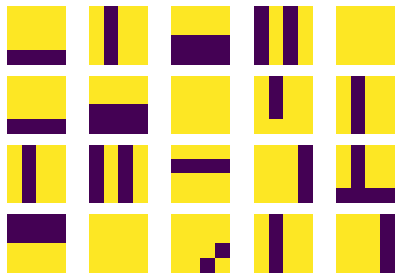

In [6]:
################################## Sampling ####################################
N = 1000
prob_v,_ = gibbs_sampler(torch.rand(N,DATA_SIZE),k=10)
img_samples = prob_v.view(N,*SHAPE).bernoulli()
# PLot some samples
fig,axs = plt.subplots(4,5)
for ax,img in zip(axs.flat,img_samples):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()
# Get and print score
p,r,score = train_dataset.score(img_samples)
print(f"qBAS : Precision = {p:.02} Recall = {r:.02} Score = {score:.02}")


In [7]:
############################## RECONSTRUCTION ##################################
k = 10
count = 0
mask = torch_transforms.functional.erase(torch.ones(1,M,N),1,1,2,2,0).flatten()
for img, label in train_dataset:

    clamped = mask*img.flatten(1)
    prob_hk = rbm.forward(clamped + (1-mask)*0.5)
    prob_vk = rbm.generate(prob_hk).detach()
    for _ in range(k):
        masked = clamped + (1-mask)*prob_vk.data
        prob_hk.data = rbm.forward(masked).data
        prob_vk.data = rbm.generate(prob_hk).data
    recon = (clamped + (1-mask)*prob_vk).bernoulli().view(img.shape)

    if recon.equal(img):
        count+=1
print(f"Dataset Reconstruction: {count/len(train_dataset):.02}")


Dataset Reconstruction: 0.9


Text(0.5, 0, 'Epoch')

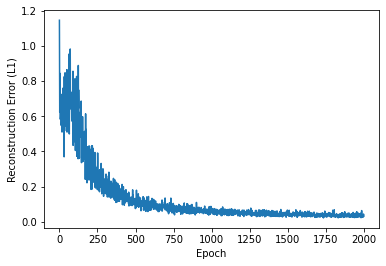

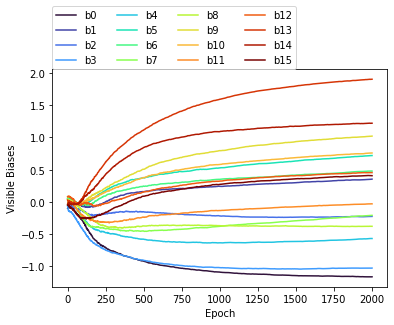

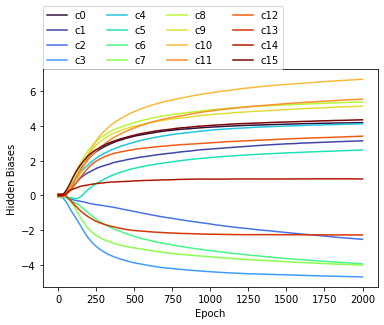

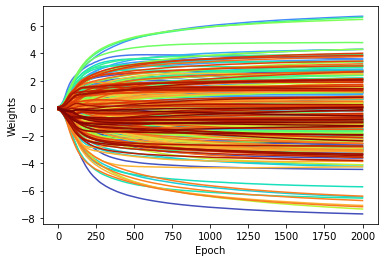

In [8]:
############################ MODEL VISUALIZATION ###############################

# L1 error graph
plt.plot(err_log)
plt.ylabel("Reconstruction Error (L1)")
plt.xlabel("Epoch")
plt.savefig("classical_err_log.pdf")

# Visible bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',DATA_SIZE).colors))
lc_v = ax.plot(b_log)
plt.legend(lc_v,[f'b{i}' for i in range(DATA_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Visible Biases")
plt.xlabel("Epoch")
plt.savefig("classival_b_log.pdf")

# Hidden bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',HIDDEN_SIZE).colors))
lc_h = plt.plot(c_log)
plt.legend(lc_h,[f'c{i}' for i in range(HIDDEN_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Hidden Biases")
plt.xlabel("Epoch")
plt.savefig("classical_c_log.pdf")

# Weights graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',rbm.V*rbm.H).colors))
lc_w = plt.plot(W_log)
plt.ylabel("Weights")
plt.xlabel("Epoch")


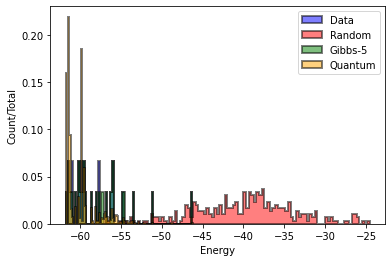

In [9]:
################################## ENERGY ######################################

data_energies = []
for img,label in train_dataset:
    data = img.flatten(1)
    data_energies.append(rbm.free_energy(data).item())

rand_energies = []
rand_data = torch.rand(len(train_dataset)*10,rbm.V)
for img in rand_data:
    rand_energies.append(rbm.free_energy(img.bernoulli()).item())

gibbs_energies = []
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
for img,label in train_dataset:
    data = img.flatten(1)
    prob_v,prob_h = gibbs_sampler(data,k=5)
    gibbs_energies.append(rbm.free_energy(prob_v.bernoulli()).item())

qa_energies = []
solver_name = "Advantage_system1.1"
qa_sampler = qaml.sampler.QASampler(rbm,solver=solver_name,beta=2.5)
qa_sampleset = qa_sampler(num_reads=1000,auto_scale=False)
for s_v,s_h in zip(*qa_sampleset):
    qa_energies.append(rbm.free_energy(s_v.detach()).item())

plot_data = [(data_energies,  'Data',    'blue'),
             (rand_energies,  'Random',  'red'),
             (gibbs_energies, 'Gibbs-5', 'green'),
             (qa_energies,    'Quantum', 'orange')]

hist_kwargs = {'ec':'k','lw':2.0,'alpha':0.5,'histtype':'stepfilled','bins':100}
weights = lambda data: [1./len(data) for _ in data]

for data,name,color in plot_data:
    plt.hist(data,weights=weights(data),label=name,color=color,**hist_kwargs)

plt.xlabel("Energy")
plt.ylabel("Count/Total")
plt.legend(loc='upper right')
plt.savefig("classical_energies.pdf")


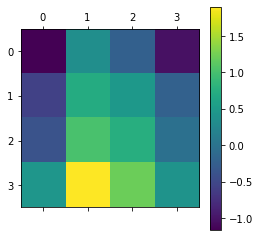

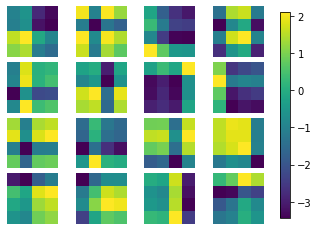

In [10]:
################################## VISUALIZE ###################################
plt.matshow(rbm.b.detach().view(*SHAPE), cmap='viridis')
plt.colorbar()
plt.savefig("classical_b.pdf")

fig,axs = plt.subplots(HIDDEN_SIZE//4,4)
for i,ax in enumerate(axs.flat):
    weight_matrix = rbm.W[i].detach().view(*SHAPE)
    ms = ax.matshow(weight_matrix, cmap='viridis')
    ax.axis('off')
fig.subplots_adjust(wspace=0.1, hspace=0.1)
cbar = fig.colorbar(ms, ax=axs.ravel().tolist(), shrink=0.95)
plt.savefig("classical_weights.pdf")